# **Exploratory Data Analysis on Diamonds Sales**

In this notebook we will be performing EDA on Diamonds Dataset to get a good understanding of the dataset, gain further insights and share findings. We will be 
1. Cleaning Data: 
    - Handle missing and duplicate values. 
    - Find and remove outliers for numeric data.
    - Check for any inconsitent data.
2. Performing Feature Analysis: 
    - Understand individual features and how they impact the Price of diamonds(our target variable).
    - Create vizualizations to illustrate key findings and trends.
3. Selecting the best features:
    - Identify the most significant features.

## Index
1. [Importing Libraries](#1-importing-libraries)
2. [Data Loading](#2-data-loading)
3. [Data Cleaning](#3-data-cleaning)
4. [Feature Analysis and Visualizations](#4-feature-analysis-and-visualizations)
    * [Distribution of Diamond Prices](#distribution-of-diamond-prices)
    * [Carat vs Price](#carat-vs-price)
    * [Clarity vs Price](#clarity-vs-price)
    * [Color vs Price](#color-vs-price)
    * [Cut vs Price](#cut-vs-price)
    * [Fancy Color vs Price](#fancy-color-vs-price)
    * [Fancy Color Intensity vs Price](#fancy-color-intensity-vs-price)
5. [Correlation Analysis](#5-correlation-analysis)
6. [Takeaway](#lets-answer-some-questions)

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Loading

In [2]:
df = pd.read_csv('../data/raw/diamonds.csv')
df.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


In [3]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   219703 non-null  int64  
 1   cut                          219703 non-null  object 
 2   color                        219703 non-null  object 
 3   clarity                      219703 non-null  object 
 4   carat_weight                 219703 non-null  float64
 5   cut_quality                  219703 non-null  object 
 6   lab                          219703 non-null  object 
 7   symmetry                     219703 non-null  object 
 8   polish                       219703 non-null  object 
 9   eye_clean                    219703 non-null  object 
 10  culet_size                   219703 non-null  object 
 11  culet_condition              219703 non-null  object 
 12  depth_percent                219703 non-null  float64
 13 

**Note:**
1. The first column 'Unnamed: 0' is redundant.
2. There are 219703 entries of diamonds with 24 varibles and total sales price as the dependent.
2. We can see that the data has null values, which we will deal with in the next section.


## 3. Data Cleaning

### i) Handle Duplicates and Missing Values

In [4]:
# Drop the first column
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


In [5]:
# Check for duplicates
print(df.duplicated().sum())
df.drop_duplicates(inplace=True, ignore_index=True)
df.shape

3880


(215823, 25)

In [6]:
# Check for missing values
df.isnull().sum()

cut                                 0
color                               0
clarity                             0
carat_weight                        0
cut_quality                         0
lab                                 0
symmetry                            0
polish                              0
eye_clean                           0
culet_size                          0
culet_condition                     0
depth_percent                       0
table_percent                       0
meas_length                         0
meas_width                          0
meas_depth                          0
girdle_min                          0
girdle_max                          0
fluor_color                         0
fluor_intensity                140711
fancy_color_dominant_color          0
fancy_color_secondary_color         0
fancy_color_overtone             1630
fancy_color_intensity               0
total_sales_price                   0
dtype: int64

In [7]:
# Fluorescence Intenity has a lot of missing values, so we can drop it
df.drop('fluor_intensity', axis=1, inplace=True)
# Replace NaN with 'unknown' in the remaining columns
df.replace(np.nan, 'unknown', inplace=True)

In [8]:
df_original = df.copy()

### ii) Deal with inconsistent Categorical Data

In [9]:
cat_columns = [x for x in df.columns if df[x].dtype == 'object']
print(len(cat_columns))

cat_values = pd.DataFrame(df[cat_columns].apply(lambda x: x.unique().tolist()))
with pd.option_context('display.max_colwidth', 1):
    display(cat_values)

17


,0
cut,"[Round, Pear, Oval, Marquise, Princess, Emerald, Heart, Cushion, Radiant, Cushion Modified, Asscher]"
color,"[E, F, L, D, J, I, G, H, M, K, unknown]"
clarity,"[VVS2, VVS1, I1, VS1, VS2, IF, SI2, I2, SI1, SI3, I3]"
cut_quality,"[Excellent, Very Good, unknown, Good, Fair, Ideal]"
lab,"[IGI, GIA, HRD]"
symmetry,"[Very Good, Excellent, Good, Fair, Poor]"
polish,"[Very Good, Excellent, Good, Fair, Poor]"
eye_clean,"[unknown, Yes, E1, Borderline, No]"
culet_size,"[N, unknown, S, M, VS, L, EL, SL, VL]"
culet_condition,"[unknown, Abraded, Chipped, Pointed]"


In [10]:
# Check for invalid data points
# 1. Diamonds with a color grade and a fancy color dominant color
display(df.loc[(df['color']!='unknown') & (df['fancy_color_dominant_color']!='unknown')])

# 2. Diamonds with a color grade and a fancy color overtone
display(df.loc[(df['color']!='unknown') & (df['fancy_color_overtone']!='unknown')])

# 3. Diamonds with an unknown color grade and an unknown fancy color dominant color
display(df.loc[(df['color']=='unknown') & (df['fancy_color_dominant_color']=='unknown')])

# 4. Diamonds of an invalid clarity grade i.e, SI3  
display(df.loc[(df['clarity']=='SI3')])

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
7646,Round,M,VVS1,0.33,Excellent,GIA,Excellent,Excellent,unknown,unknown,...,4.49,2.72,unknown,unknown,Blue,Other,unknown,unknown,unknown,618
147155,Oval,M,VVS2,0.81,unknown,GIA,Very Good,Excellent,unknown,N,...,4.60,2.80,unknown,unknown,unknown,Other,unknown,unknown,unknown,3802


,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
9157,Round,K,VVS2,0.30,Excellent,GIA,Excellent,Excellent,unknown,unknown,...,4.29,2.68,unknown,unknown,unknown,unknown,unknown,Yellowish,unknown,624
149697,Pear,D,SI1,0.77,unknown,GIA,Very Good,Very Good,unknown,unknown,...,4.88,3.37,STK,XTK,unknown,unknown,unknown,Greenish,unknown,3882
151367,Pear,D,VS2,0.73,unknown,GIA,Very Good,Very Good,unknown,unknown,...,4.89,3.42,TK,XTK,unknown,unknown,unknown,Greenish,unknown,4119
157032,Round,K,VS2,1.10,Excellent,IGI,Excellent,Excellent,unknown,unknown,...,6.52,4.11,STK,STK,unknown,unknown,unknown,Brownish,unknown,4754
215341,Round,D,VVS2,5.05,Excellent,GIA,Excellent,Excellent,unknown,N,...,11.30,6.66,unknown,unknown,Blue,unknown,unknown,Yellowish,unknown,233311
215377,Round,E,VVS1,5.49,Excellent,GIA,Excellent,Excellent,unknown,N,...,11.32,6.95,unknown,unknown,Blue,unknown,unknown,Yellowish,unknown,245952


,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price


,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
129,Round,H,SI3,0.23,Very Good,IGI,Very Good,Very Good,unknown,unknown,...,0.0,0.0,unknown,unknown,unknown,unknown,unknown,unknown,unknown,284
148,Round,H,SI3,0.24,Very Good,IGI,Very Good,Very Good,unknown,unknown,...,0.0,0.0,unknown,unknown,unknown,unknown,unknown,unknown,unknown,296
170,Round,H,SI3,0.25,Very Good,IGI,Very Good,Very Good,unknown,unknown,...,0.0,0.0,unknown,unknown,unknown,unknown,unknown,unknown,unknown,308
211,Round,H,SI3,0.26,Very Good,IGI,Very Good,Very Good,unknown,unknown,...,0.0,0.0,unknown,unknown,unknown,unknown,unknown,unknown,unknown,320
227,Round,F,SI3,0.24,Very Good,IGI,Very Good,Very Good,unknown,unknown,...,0.0,0.0,unknown,unknown,unknown,unknown,unknown,unknown,unknown,324
292,Round,H,SI3,0.27,Very Good,IGI,Very Good,Very Good,unknown,unknown,...,0.0,0.0,unknown,unknown,unknown,unknown,unknown,unknown,unknown,334
392,Round,H,SI3,0.29,Very Good,IGI,Very Good,Very Good,unknown,unknown,...,0.0,0.0,unknown,unknown,unknown,unknown,unknown,unknown,unknown,358
9527,Round,G,SI3,0.30,Very Good,IGI,Very Good,Very Good,unknown,unknown,...,0.0,0.0,unknown,unknown,unknown,unknown,unknown,unknown,unknown,630
18985,Round,F,SI3,0.32,Very Good,IGI,Very Good,Very Good,unknown,unknown,...,0.0,0.0,unknown,unknown,unknown,unknown,unknown,unknown,unknown,720


In [11]:
# 1. Changing 'Other' value to unknown in fancy_color_dominant_color field
df['fancy_color_dominant_color'] = df['fancy_color_dominant_color'].replace('Other', 'unknown')

# 2. D, E, F are colorless diamonds, K, L, M are faint yellow diamonds so we can remove fancy color
# overtone for the colorless diamonds.
df.loc[(df['color']=='D') | (df['color']=='E'), 'fancy_color_overtone'] = 'unknown'

# 4. SI3 is not a valid clarity grade, it should be I1 
# https://beyond4cs.com/clarity/si3-grading/
df['clarity'] = df['clarity'].replace('SI3', 'I1')

### iii) Remove outliers and inconsistent entries for Quantitative Data

In [12]:
df.describe()

,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,215823.000000,215823.000000,215823.000000,215823.000000,215823.000000,215823.000000,2.158230e+05
mean,0.757719,61.728223,57.977371,5.561464,5.142264,3.291251,6.940346e+03
std,0.844707,9.803163,9.311637,1.762365,1.369539,2.068912,2.603431e+04
min,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02
25%,0.310000,61.200000,57.000000,4.350000,4.310000,2.680000,9.580000e+02
50%,0.500000,62.400000,58.000000,5.070000,4.800000,3.040000,1.980000e+03
75%,1.000000,63.500000,60.000000,6.360000,5.710000,3.650000,5.292000e+03
max,19.350000,98.700000,94.000000,93.660000,62.300000,76.300000,1.449881e+06


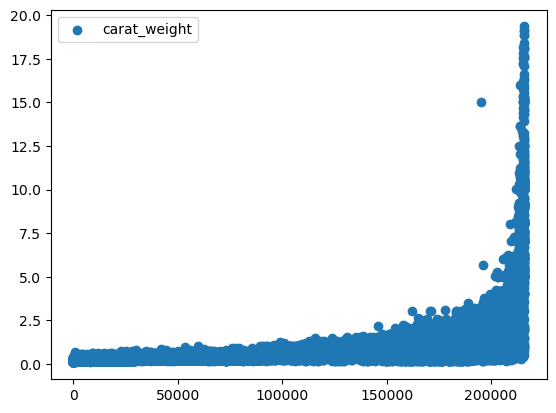

C:\Users\tsree\AppData\Local\Temp\ipykernel_55244\1178365760.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers_df = pd.concat([outliers_df, df.loc[(df[col]==0)]])


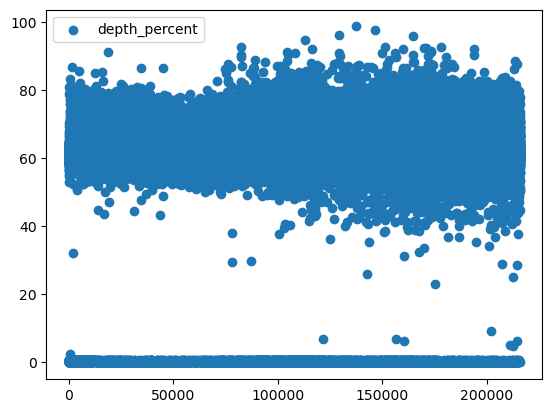

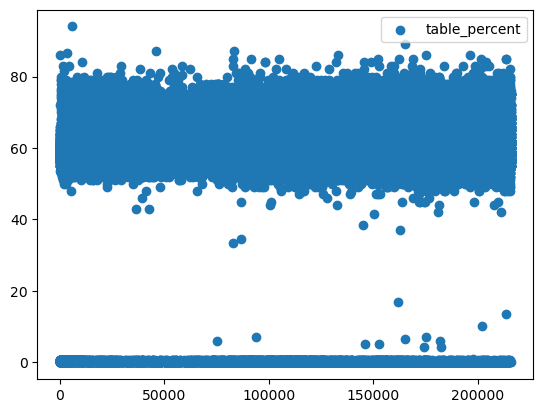

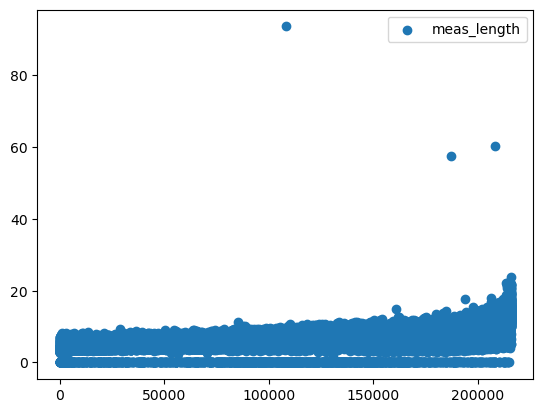

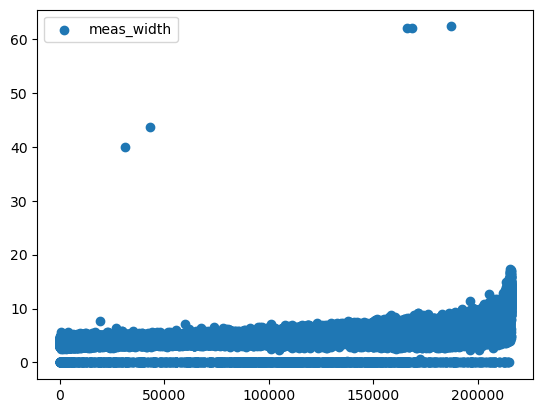

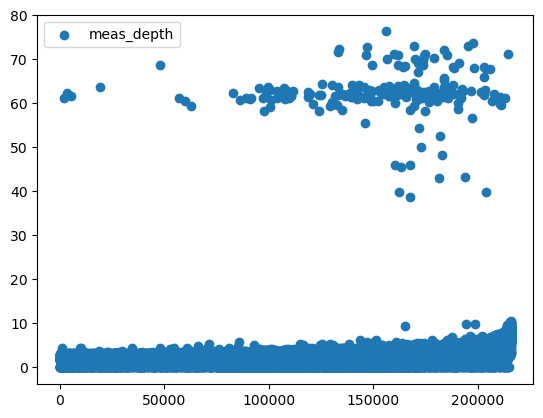

In [13]:
# Finding outliers
outliers_df = pd.DataFrame(columns=list(df))

for col in list(df):
    if df[col].dtypes == 'float64':
        # Add data points with a value of 0 for any numeric column to the outliers dataframe
        outliers_df = pd.concat([outliers_df, df.loc[(df[col]==0)]])
        plt.scatter(df.index, df[col], label=col) 
        plt.legend()
        plt.show() 

In [14]:
# Drop outliers from the above scatter plots
outliers_df = pd.concat([outliers_df, df.loc[(df['meas_depth']>30) | (df['meas_width']>30) | 
                (df['meas_length']>40) | (df['depth_percent']<20) | (df['table_percent']<20)]])
print(outliers_df.shape)

df = df.drop(outliers_df.index).reset_index(drop=True)
print(df.shape)

(17615, 24)
(209496, 24)


In [15]:
# Save cleaned dataframe
df.to_pickle('../data/processed/diamonds_cleaned.pkl')

## 4. Feature Analysis and Visualizations

#### Distribution of Diamond Prices

c:\Users\tsree\anaconda3\envs\pybasics\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


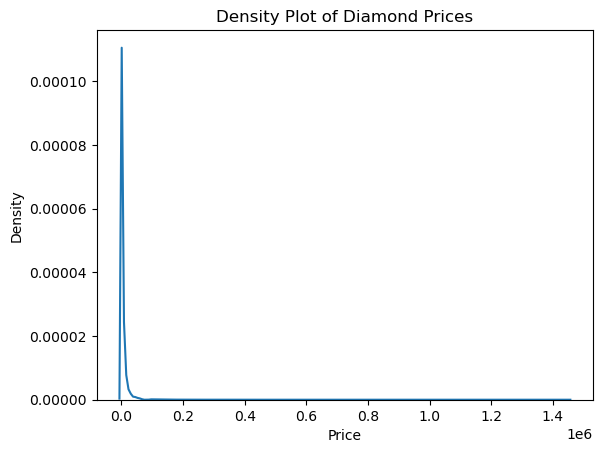

In [16]:
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Density Plot of Diamond Prices')

sns.kdeplot(df['total_sales_price'])
plt.savefig('../images/density_plot_prices.png')
plt.show()

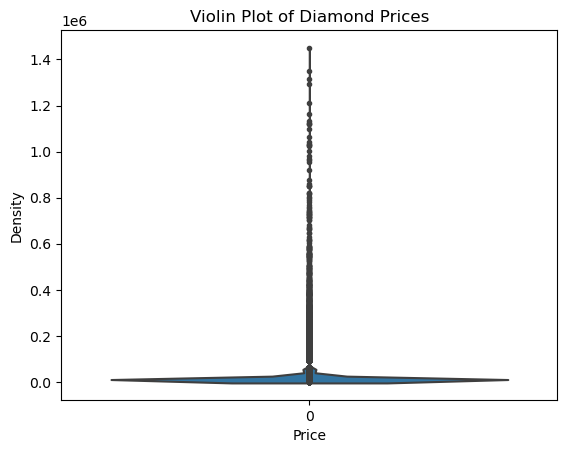

In [17]:
# violin plot
sns.violinplot(df['total_sales_price'], inner='point')
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Violin Plot of Diamond Prices')
plt.savefig('../images/violin_plot_prices.png')
plt.show()

#### Carat vs Price

In [18]:
# create df grouped by carat weight and its respective mean of total sales price
temp_df = df[['carat_weight', 'total_sales_price']]
carat_df = temp_df.groupby('carat_weight').mean().reset_index()

# create df of colorless diamonds grouped by carat weight and its 
# respective mean of total sales price
temp_df = df[(df.color!='unknown')][['carat_weight', 'total_sales_price']]
carat_colorless_df = temp_df.groupby('carat_weight').mean().reset_index()

C:\Users\tsree\AppData\Local\Temp\ipykernel_55244\2839273039.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='carat_weight', y='total_sales_price', palette='Set2')


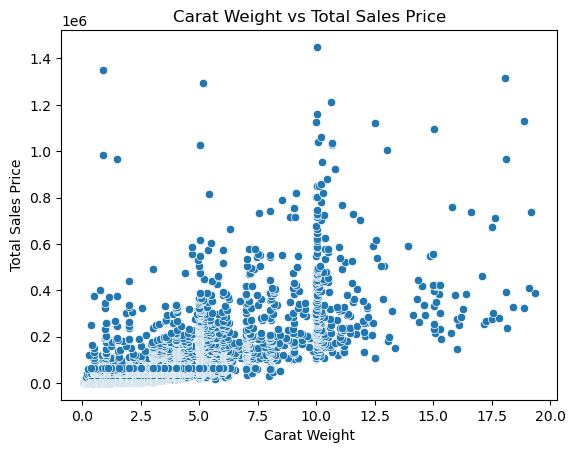

In [19]:
# Scatter plot of carat weight vs total sales price

# df['color_group'] = df['color'].apply(lambda x: 'Colored' if x == 'unknown' else 'Colorless')
sns.scatterplot(data=df, x='carat_weight', y='total_sales_price', palette='Set2')
plt.title('Carat Weight vs Total Sales Price')
plt.xlabel('Carat Weight')
plt.ylabel('Total Sales Price')
plt.grid(False)
plt.savefig('../images/cw_vs_total_sales.png')
plt.show()

In [20]:
# sns.scatterplot(data=df, x='carat_weight', y='total_sales_price', hue='color_group', palette='Set2')

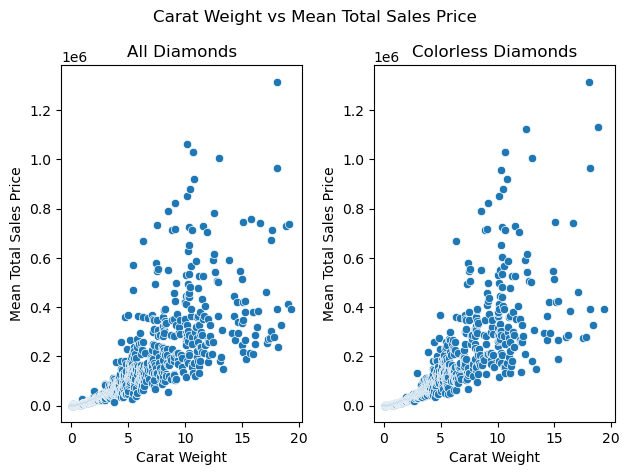

In [21]:
# Scatter plots of carat weight vs mean total sales price
fig, axes = plt.subplots(1, 2, layout='tight')

sns.scatterplot(data=carat_df, x='carat_weight', y='total_sales_price', ax=axes[0])
sns.scatterplot(data=carat_colorless_df, x='carat_weight', y='total_sales_price', ax=axes[1])

axes[0].set(title='All Diamonds', xlabel='Carat Weight', 
             ylabel='Mean Total Sales Price')
axes[1].set(title='Colorless Diamonds', xlabel='Carat Weight', 
             ylabel='Mean Total Sales Price')

axes[0].grid(False) 
axes[1].grid(False)

fig.suptitle('Carat Weight vs Mean Total Sales Price')
plt.savefig('../images/scatter_cw_vs_mean_sales.png')
plt.show()

From the above plots, we can observe that:

- The mean total sales price of all diamonds is higher than the mean total sales price of colorless diamonds.
- The plot shows a strong positive correlation between carat and mean price. As the carat weight increases, the mean price also increases.
- The relationship is not perfectly linear, as carat weight increases, the mean total sales price increases at a faster rate. This indicates that larger diamonds tend to have a higher price per carat than smaller diamonds.
- The plot also suggests that for very large diamonds (above 5-6 carats), the mean total sales price increases at a faster rate than for smaller diamonds. This may indicate that the price per carat for very large diamonds is higher than for smaller diamonds, possibly due to their lower supply and demand. 

#### Clarity vs Price

In [22]:
# To analyse price vs the other features, we need data of constant carat weight
# Create dataframe of all diamonds with a median carat of 0.5
df_by_carat = df.groupby('carat_weight')
median_carat = df_by_carat.get_group(0.5).reset_index(drop=True)
display(median_carat.head())

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Oval,M,VS2,0.5,unknown,GIA,Very Good,Excellent,unknown,N,...,4.42,2.95,TK,VTK,Blue,unknown,unknown,unknown,unknown,480
1,Round,L,I1,0.5,Excellent,IGI,Excellent,Excellent,unknown,unknown,...,5.12,3.14,M,M,unknown,unknown,unknown,unknown,unknown,498
2,Round,M,SI2,0.5,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,5.22,3.04,unknown,unknown,unknown,unknown,unknown,unknown,unknown,534
3,Round,M,I1,0.5,Very Good,GIA,Very Good,Excellent,Yes,unknown,...,4.98,3.19,unknown,unknown,unknown,unknown,unknown,unknown,unknown,568
4,Round,K,I1,0.5,Very Good,GIA,Very Good,Very Good,Yes,N,...,5.11,3.06,STK,TK,unknown,unknown,unknown,unknown,unknown,576


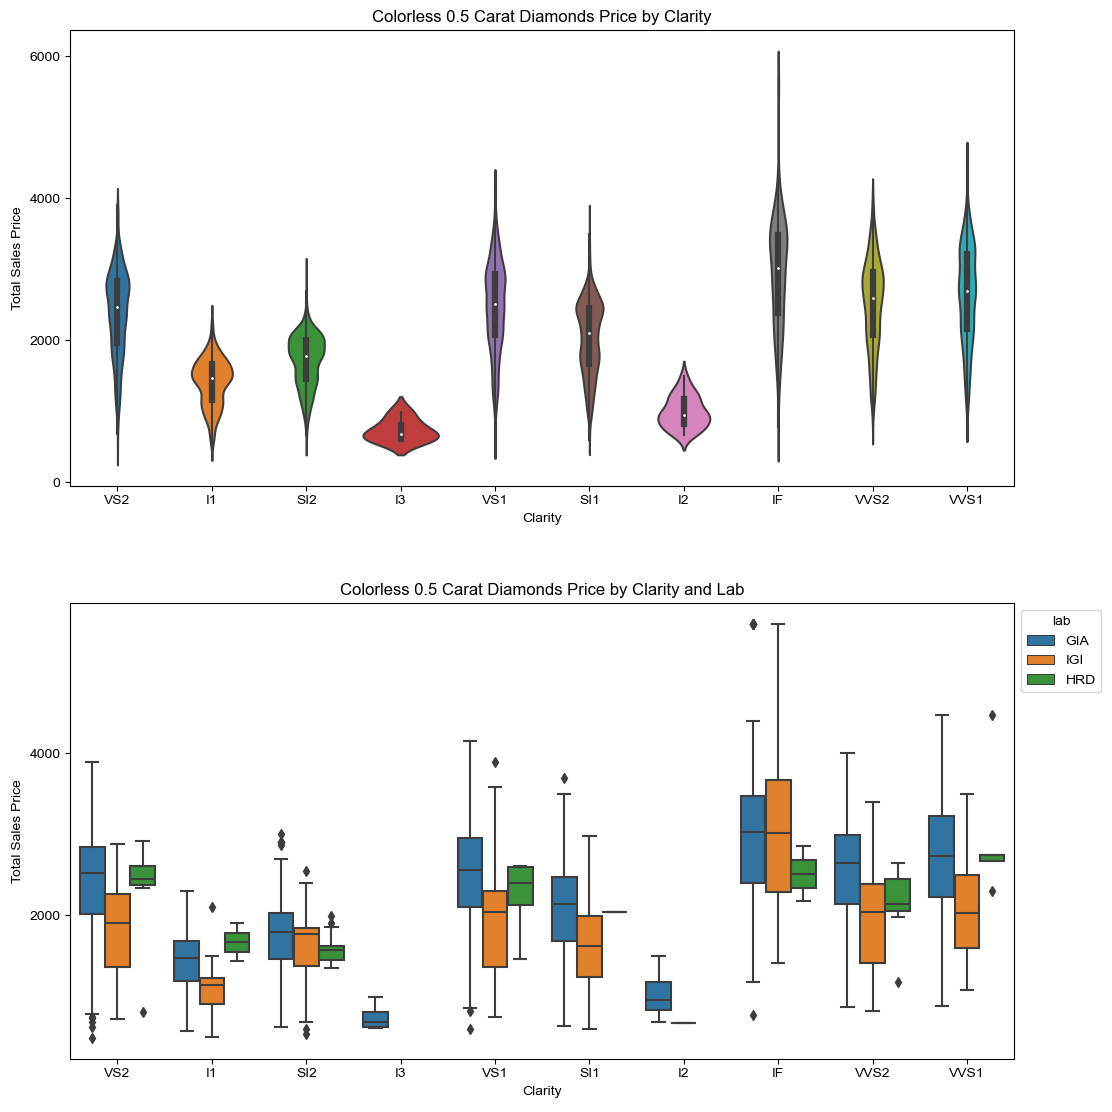

In [23]:
# Dataframe of median carat colorless diamonds
colorless_median_carat = median_carat[median_carat['fancy_color_dominant_color']=='unknown']

# Box plot of median carat colorless diamonds Price by its clarity
fig3, axes = plt.subplots(2, 1, layout='tight', figsize=(12, 12))
sns.violinplot(colorless_median_carat, x='clarity', y='total_sales_price', ax=axes[0])
axes[0].set(title='Colorless 0.5 Carat Diamonds Price by Clarity', xlabel='Clarity', ylabel='Total Sales Price')

# Box plot of median carat colorless diamonds Price by its clarity and lab
sns.boxplot(colorless_median_carat, x='clarity', y='total_sales_price', hue='lab', ax=axes[1])
sns.move_legend(axes[1], "upper left", bbox_to_anchor=(1, 1))
axes[1].set(title='Colorless 0.5 Carat Diamonds Price by Clarity and Lab', xlabel='Clarity', ylabel='Total Sales Price')
sns.set_theme(font_scale=3)
plt.savefig('../images/box_plot_half_carat_prices_by_clarity.png')
plt.show()

From the Clarity vs Price plot:
1. Higher clarity diamonds are more expensive: The plot shows that diamonds with higher clarity grades (IF, VVS1, VVS2, VS1, VS2) tend to be more expensive than those with lower clarity grades.
2. Clarity has a significant impact on price
3. The price of diamonds with inclusions (I) is significantly lower: The plot shows that diamonds with inclusions (I) have a significantly lower price than diamonds with other clarity grades.

From the Clarity vs Price by Lab plot:
1. We also see that there is a significant difference in prices of diamonds graded by different labs
2. In general GIA graded diamonds are more expensive for the same grade of 0.5 carat diamonds than the ones graded by IGI
3. There isnt significant relation observed regarding HRD lab, as they have the least number of diamonds graded compared to the other 2 labs.

#### Color vs Price

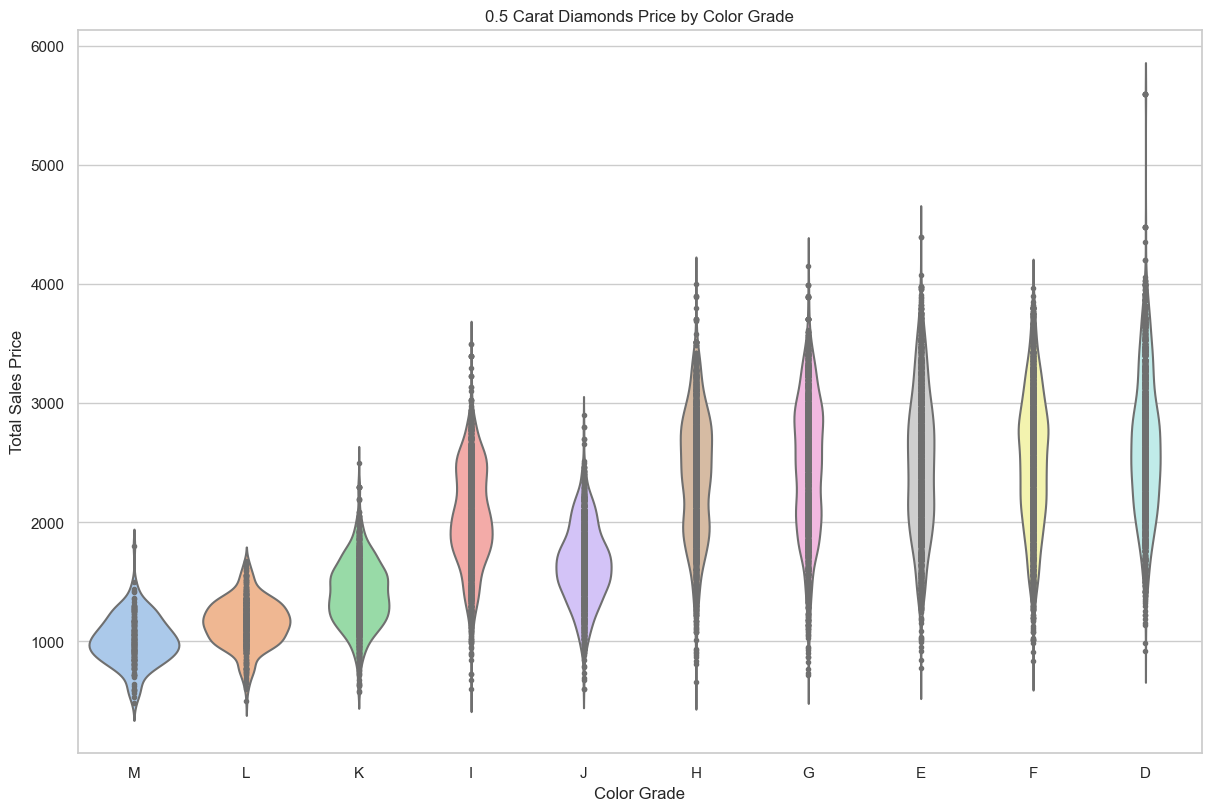

In [33]:
colorless_median_carat
# Violin plot of median carat colorless diamonds Price by its color grade
fig4, axes = plt.subplots(1, 1, layout='constrained', figsize=(12, 8))
sns.violinplot(colorless_median_carat, x='color', y='total_sales_price', inner='point')

# sns.set_theme(style='whitegrid', palette='pastel')
axes.set(title='0.5 Carat Diamonds Price by Color Grade',
        xlabel='Color Grade', ylabel='Total Sales Price')
plt.savefig('../images/violin_plot_color.png')
plt.show()

From the above plot we can see that:
1. Colorless diamonds (D-F) are the most expensive with a higher price range than other color grades.
2. Near colorless diamonds (G-J) are less expensive than colorless diamonds but still more expensive than diamonds with a noticeable color.
3. Diamonds with a noticeable color (K-M) are less expensive than colorless and near colorless diamonds.
4. Density of K-M diamonds is also the highest among the rest, which shows the supply and demand is high for them compared to the more expensive diamonds which checks out.

#### Cut vs Price

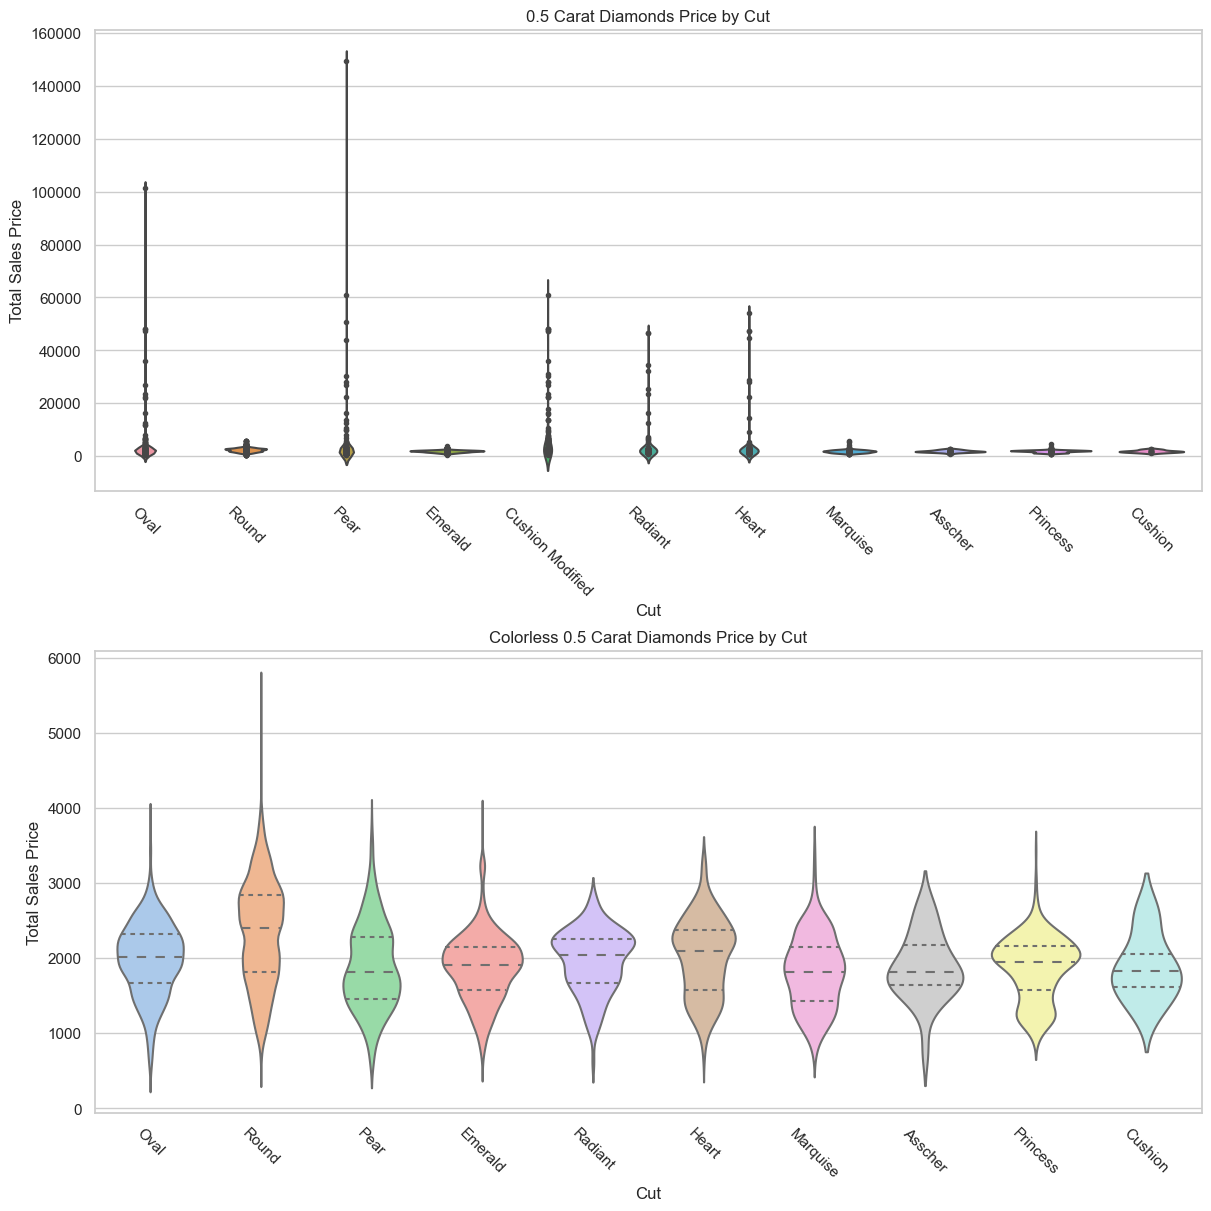

In [32]:
# Cut vs Price
fig5, axes = plt.subplots(2, 1, layout='constrained', figsize=(12, 12))
sns.set_theme(style='whitegrid', palette='pastel')
sns.violinplot(median_carat, x='cut', y='total_sales_price', inner='point', ax=axes[0], density_norm='area')
axes[0].set(title='0.5 Carat Diamonds Price by Cut',
        xlabel='Cut', ylabel='Total Sales Price')

sns.violinplot(colorless_median_carat, x='cut', y='total_sales_price', inner='quart', ax=axes[1], density_norm='count', common_norm=True)
axes[1].set(title='Colorless 0.5 Carat Diamonds Price by Cut',
        xlabel='Cut', ylabel='Total Sales Price')

for ax in axes:
    ax.tick_params(axis='x', labelrotation = -45)

plt.savefig('../images/violin_plot_cut.png')
plt.show()

In [26]:
# median of total sales price by cut and color
pd.pivot_table(colorless_median_carat, values='total_sales_price', index='cut', columns='color', aggfunc='median')

color,D,E,F,G,H,I,J,K,L,M
cut,,,,,,,,,,
Asscher,2550.0,2130.0,1668.0,1766.0,1960.0,1563.0,NaN,NaN,764.0,NaN
Cushion,1680.0,1826.0,1560.0,NaN,NaN,2276.0,NaN,NaN,NaN,NaN
Emerald,2204.0,2040.0,2002.0,2002.0,1830.0,1685.0,1322.0,997.0,894.0,845.0
Heart,2436.0,2288.0,2260.0,2174.0,1940.0,1756.0,1375.0,1260.0,1044.0,990.0
Marquise,2093.0,1842.0,1968.0,1821.0,1949.0,1676.0,1317.0,1104.0,820.0,NaN
Oval,2304.0,2278.0,2108.0,2112.0,1950.0,1776.0,1393.0,1050.0,900.0,534.0
Pear,2194.0,1870.0,2078.0,1819.0,1898.0,1560.0,1354.0,1050.0,755.0,725.0
Princess,2228.0,2090.0,2092.0,2016.0,1920.0,1782.0,1344.0,1225.0,1170.0,1040.0
Radiant,2366.0,2168.0,2211.0,2046.0,2042.0,1746.0,1300.0,1065.0,NaN,622.0


1. Round Brilliant cut diamonds are the most expensive with a higher price range than other cuts

#### Fancy Color vs Price

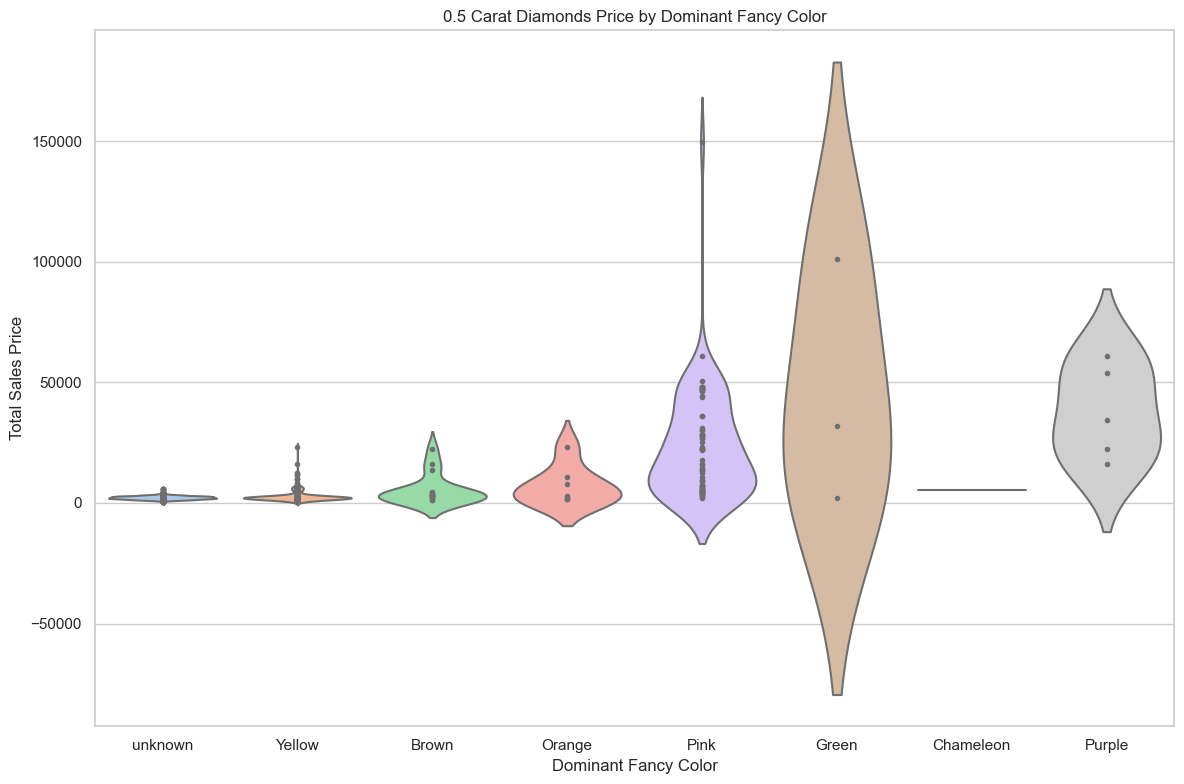

In [27]:
# Box plots of median carat diamonds Price by Dominant Fancy Colors
# sns.boxplot(median_carat, x='fancy_color_dominant_color', y='total_sales_price', color='skyblue',saturation=0.3, )
fig1, axes = plt.subplots(1, 1, layout='tight', figsize=(12, 8))
fig1 = sns.violinplot(median_carat, x='fancy_color_dominant_color', y='total_sales_price', inner='point',scale='width', ax=axes)

sns.set_theme(style='whitegrid', palette='pastel')
fig1.set(title='0.5 Carat Diamonds Price by Dominant Fancy Color',
        xlabel='Dominant Fancy Color', ylabel='Total Sales Price')
plt.savefig('../images/violin_plot_fancy_color.png')
plt.show()

From the above violinplot:
1. Fancy color diamonds are more expensive: The plot shows that fancy color diamonds tend to have a higher price range than colorless diamonds.
2. Pink diamonds are the most expensive fancy color diamonds.
3. Yellow diamonds are relatively affordable: The plot shows that yellow and brown diamonds have a relatively low median price, indicating that they are more affordable than pink and blue diamonds.
4. Green and Chameleon diamonds are extremely rare 

#### Fancy Color Intensity vs Price

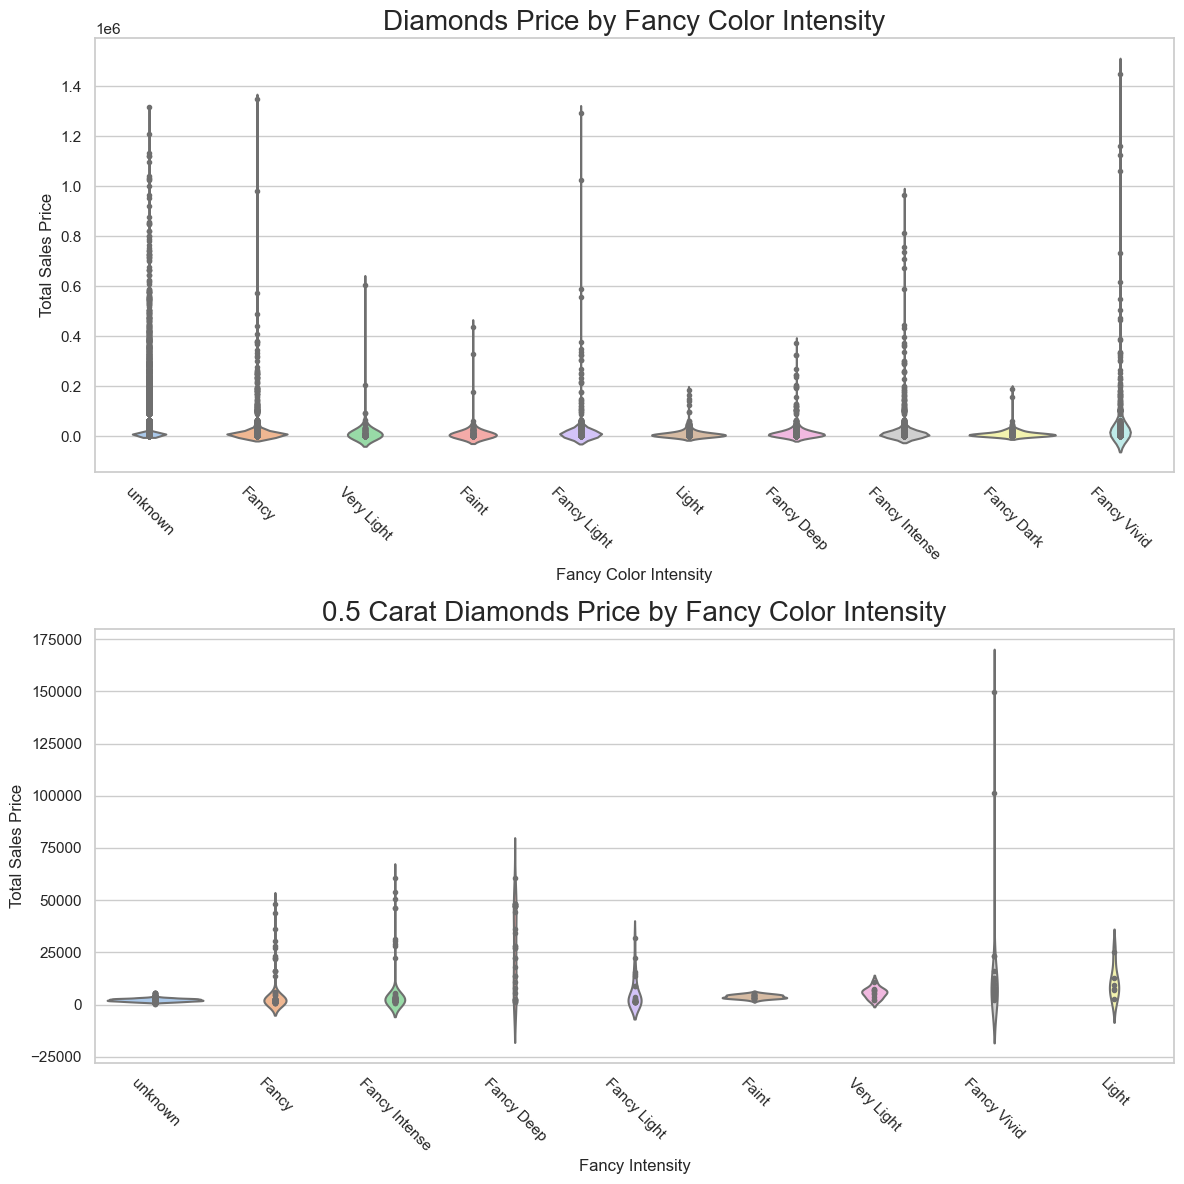

In [28]:
# Fancy intensity vs price
fig6, axes = plt.subplots(2, 1, layout='tight', figsize=(12, 12))
sns.set_theme(style='whitegrid', palette='pastel')
sns.violinplot(median_carat, x='fancy_color_intensity', y='total_sales_price', inner='point', ax=axes[1])
axes[1].set(title='0.5 Carat Diamonds Price by Fancy Color Intensity',
        xlabel='Fancy Intensity', ylabel='Total Sales Price')

sns.violinplot(df, x='fancy_color_intensity', y='total_sales_price', inner='point', ax=axes[0])
axes[0].set(title='Diamonds Price by Fancy Color Intensity',
        xlabel='Fancy Color Intensity', ylabel='Total Sales Price')

for ax in axes:
    ax.tick_params(axis='x', labelrotation = -45)
    ax.title.set_size(20)

plt.savefig('../images/violin_plot_fancy_intensity.png')
plt.show()

From above plot:
1. The price of fancy color diamonds increases as the intensity of the color increases.
2. Fancy Vivid and Fancy Intense fancy color diamonds are the most expensive.

## 5. Correlation Analysis

In [29]:

numeric_columns = df.select_dtypes(exclude='object').columns
df_encoded = df[numeric_columns].copy()
df_encoded[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])

# Calculate the correlation matrix
corr_matrix = df_encoded.corr().abs()

# Select the features that are most strongly associated with price
top_features = corr_matrix['total_sales_price'].sort_values(ascending=False)

# Print the top 10 features
print(top_features.nlargest(15))

total_sales_price             1.000000
carat_weight                  0.745154
meas_depth                    0.542327
meas_width                    0.541605
meas_length                   0.509540
cut                           0.115150
fancy_color_dominant_color    0.113884
fancy_color_intensity         0.099142
cut_quality                   0.093071
table_percent                 0.077719
eye_clean                     0.059286
color                         0.058763
symmetry                      0.037486
girdle_max                    0.036604
depth_percent                 0.034261
Name: total_sales_price, dtype: float64


In [30]:
top_features

total_sales_price              1.000000
carat_weight                   0.745154
meas_depth                     0.542327
meas_width                     0.541605
meas_length                    0.509540
cut                            0.115150
fancy_color_dominant_color     0.113884
fancy_color_intensity          0.099142
cut_quality                    0.093071
table_percent                  0.077719
eye_clean                      0.059286
color                          0.058763
symmetry                       0.037486
girdle_max                     0.036604
depth_percent                  0.034261
fancy_color_secondary_color    0.030144
fluor_color                    0.029675
lab                            0.023366
culet_condition                0.021211
girdle_min                     0.018174
polish                         0.013938
fancy_color_overtone           0.008101
culet_size                     0.004624
clarity                        0.001368
Name: total_sales_price, dtype: float64

c:\Users\tsree\anaconda3\envs\pybasics\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


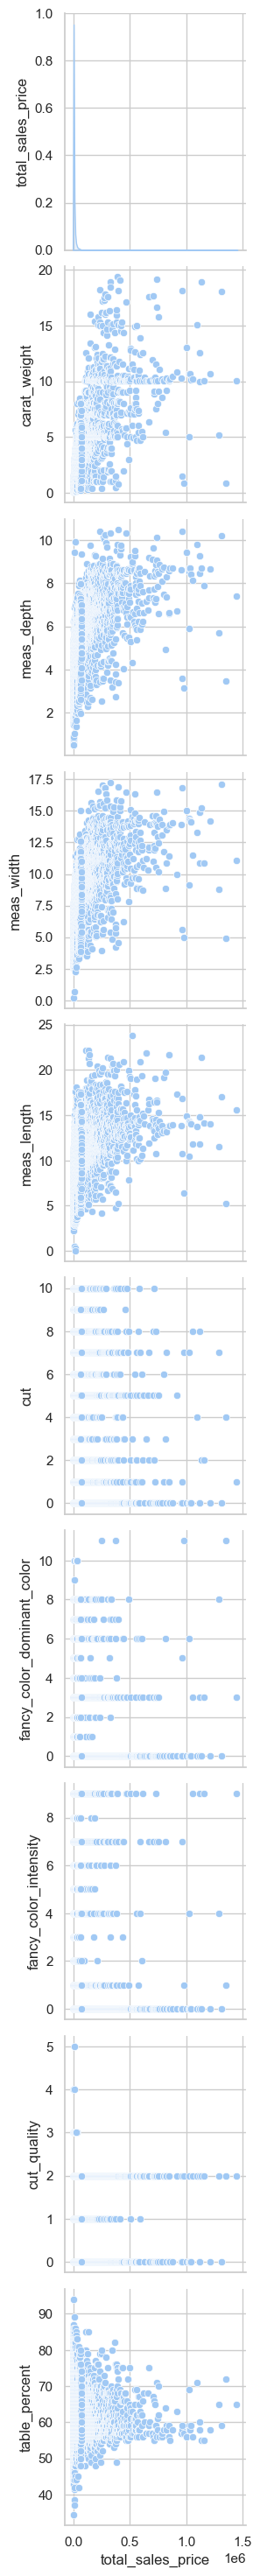

In [31]:
# Create a scatterplot matrix of the top 10 features
sns.pairplot(df_encoded[top_features.index[:10]], x_vars='total_sales_price', diag_kind='kde', height=3)
plt.show()

# Lets Answer some Questions

### Q) How do the 4Cs affect the sales price of a diamond?
A) The 4Cs (carat, color, clarity, and cut) have a significant impact on the sales price of a diamond. Carat weight affects the price the most, with larger diamonds being more rare and valuable. Color affects the price, with colorless diamonds being more valuable than diamonds with a noticeable color that is not fancy color. Clarity affects the price, with diamonds with fewer inclusions and blemishes being more valuable. Cut affects the price, with well-cut diamonds being more valuable than poorly cut diamonds.


### Q) Is there a difference in how each lab prices their diamonds?
A) As obeserved in the colorless 0.5 carat price by clarity and lab, in general GIA graded diamonds are more expensive for the same grade of diamonds than the ones graded by IGI. As for the HRD lab, data has be consistent and follows no noticibe trends.


### Q) Are colorless diamonds worth more than diamonds of any fancy color?
A) Generally, yes. Colorless diamonds are considered to be more rare and valuable than diamonds with a noticeable color. However, some fancy color diamonds, such as pink or green diamonds, can be more valuable than colorless diamonds due to their rarity and demand.


### Q) Do the prices of fancy color diamonds go up or down as it gets more intense??
A) The prices of fancy color diamonds can go up as the color gets more intense.


### Q) What is the ideal girdle min and girdle max for a diamond?
A) The ideal girdle min and girdle max for a diamond can vary depending on the cut and shape of the diamond. Generally, a girdle that is too thin can make the diamond more prone to chipping or cracking, while a girdle that is too thick can make the diamond appear less brilliant.